### Plamen Svetoslavov
---

In [20]:
import sympy
from mistune.plugins.math import math
import matplotlib.pyplot as plt
import numpy as np
import math

from sympy import intersection, imageset
from sympy.geometry.entity import rotate
from sympy.polys.benchmarks.bench_groebnertools import x1
from sympy.sets.sets import set_add

# High-School Maths
## Exercises

### Problem 1. Markdown and elements of LaTeX
We write text and math using `Markdown` cells (like the one you're currently reading). Find any reference on what the Markdown syntax can do, for example [this one](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet). Get acquainted with it and prepare to write some text and code for this, and all other exercises. 

Math can be a bit more complicated. Jupyter uses a subset of `LaTeX` (which is, in fact, called `MathJax`). It supports most mathematical notation you'll ever want or need. Find a reference for that as well, like [this one](https://docs.mathjax.org/en/latest/), or [this one - Overleaf](https://www.overleaf.com/latex/templates/symbol-table/fhqmttqvrnhk). I usually have a table of symbols open when I write math, in order to find what I need quickly.

Now, **for each** of the formulas below, write it in LaTeX and try to explain what it means. When writing the formula, try to be as precise as possible, even _pixel-perfect_. Note how the symbols are written, the width of spaces (it does matter!), and style (e.g., whether some text is _italic_ or not). When giving your explanations, try to show what the letters mean, what the symbols do, etc. Some formulas are much harder to explain, so don't worry about it too much. You **do not** need to explain everything. However, you **do need** to be able to write every formula.

**Note**: I have condensed the preview image. The horizontal space between (a), (b), etc., and the formulas will be much larger. Your formulas should look identical to mine, however.

![Math equations](math.jpg)

(a)
$$ y = ax + b;\: a, b \in \mathbb{R} $$
$$ y \text{ - } \text{Dependent variable} $$
$$ a \text{ - } \text{Slop or gradient. Determines the steеpness and direction of the line} $$
$$ b \text{ - } \text{Intercept. The point where the line intersects axis y at x=0} $$

(b)
$$ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

(c)
$$ \bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i $$

(d)
$$ R(\theta) = \begin{pmatrix}
\text{cos}\:\theta & \text{-sin}\:\theta \\
\text{-sin}\:\theta & \text{cos}\:\theta
\end{pmatrix} $$

(e)
$$ \int_{a}^{b}f(x)dx = \lim_{x\to\infty}\sum_{i=1}^n f(x_i)\Delta_x $$

(f)
$$\phi = {1+\cfrac{1}{1+\cfrac{1}{1+\cfrac{1}{1+...}}}}$$

(g)
$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$
$$ \text{binomial coefficient} $$

(h)
$$ \Delta f = \nabla^2 f = \frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}+\frac{\partial^2 f}{\partial z^2} $$
$$ \text{Laplacian equation} $$

### Problem 2. Solving equations
We already did linear equations. Let's now try quadratic ones. A quadratic equation looks like this: $ax^2 + bx + c = 0$, where $x$ is the variable, and $a,\ b,\ c$ are parameters. It can have 0, 1 or 2 real roots $x_1$ and $x_2$.

Let's do some _symbolic computation_ (this means, calculating things like we do with a pen and paper). We need to import `sympy` first. 

**Should your imports be in a single cell at the top or should they appear as they are used?** There's not a single valid best practice; but we usually prefer to write them at the top. This way, if a person who's executing your code is missing a library, they can download it before they've executed your code.

Let's use `sympy` to give us a quick symbolic solution to our equation. First import `sympy` (you can use the second cell in this notebook): 
```python 
import sympy 
```

Next, create symbols for all variables and parameters. You may prefer to do this in one pass or separately:
```python 
x = sympy.symbols("x")
a, b, c = sympy.symbols("a b c")
```

Now solve:
```python 
sympy.solve(a * x**2 + b * x + c)
```

In [21]:
x = sympy.symbols("x")
a, b, c = sympy.symbols("a b c")

In [22]:
sympy.solve(a * x ** 2 + b * x + c, x)

[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]

In [23]:
def quadratic_equation_solve(a, b, c):
    D = b**2 - 4*a*c

    if D < 0:
        return "No real roots"

    sqrt_D = math.sqrt(D)

    x1 = (-b - sqrt_D) / (2 * a)
    x2 = (-b + sqrt_D) / (2 * a)

    return x1, x2

In [24]:
quadratic_equation_solve(1, 0, -16)

(-4.0, 4.0)

In [25]:
quadratic_equation_solve(1, 0, 0)

(0.0, 0.0)

In [26]:
quadratic_equation_solve(1, 0, 1)

'No real roots'

\* Optional: If you want, you can write your own Python function which calculates the roots.

\* Also optional: Can you derive the formula for the roots? This means, starting from the general paramteric equation, can you derive the expression $x = ...$?

### Problem 3. Plotting lines
Let's go back to our linear equations. There are many ways to define what "linear" means, but they all boil down to the same thing.

The equation $ax + b = 0$ is called *linear* because the _function_ $f(x) = ax+b$ is a straight line. Let's see it.

We know that there are several ways to know what one particular function means. One of them is to just write the expression for it, as we did above. Another way is to **plot** it. This is one of the most exciting parts of maths and science - when we have to fiddle around with beautiful plots (although not so beautiful in this case).

How do we plot functions in general? We know that functions take many (possibly infinitely many) inputs. We can't draw all of them. We could, however, evaluate the function at some points and connect them with tiny straight lines. If the points are too many, we won't notice - the plot will look smooth.

Now, let's take a function, e.g. $y = 2x + 3$ and plot it. For this, we're going to use `numpy` arrays. You can look up more information about what they are and how they work. We'll be dealing with many of those.

First let's import `numpy`. Since the name is a bit long, a common convention is to give it an **alias**:
```python
import numpy as np
```

Import that at the top cell and don't forget to re-run it.

Next, let's create a range of values, e.g., $[-3, 5]$. There are two ways to do this. `np.arange(start, stop, step)` will give us evenly spaced numbers with a given step, while `np.linspace(start, stop, num)` will give us `num` samples. You see, one uses a fixed step, the other uses a number of points to return. When plotting functions, we usually use the latter. Let's generate, say, 1000 points (we know a straight line only needs two but we're generalizing the concept of plotting here :)).
```python
x = np.linspace(-3, 5, 1000)
```
Now, let's generate our function variable
```python
y = 2 * x + 3
```

We can print the values if we like but we're more interested in plotting them. To do this, first let's import a plotting library. `matplotlib` is the most commnly used one and we usually give it an alias as well.
```python
import matplotlib.pyplot as plt
```

Now, let's plot the values. To do this, we just call the `plot()` function. Notice that the top-most part of this notebook contains a "magic string": `%matplotlib inline`. This hints Jupyter to display all plots inside the notebook. However, it's a good practice to call `show()` after our plot is ready.
```python
plt.plot(x, y)
plt.show()
```

In [27]:
x = np.arange(-3, 5, 1)
y = 2 * x + 3

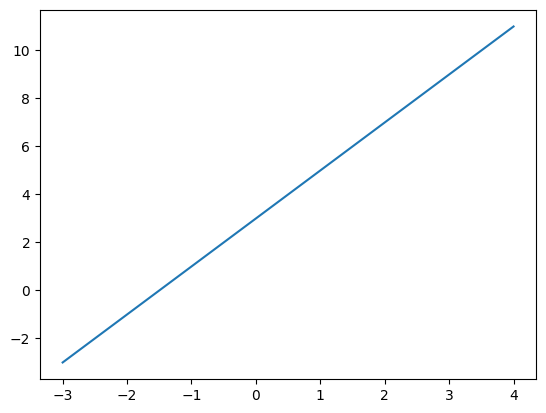

In [28]:
plt.plot(x, y)
plt.show()

### Problem 5. Intro to proofs: proof by induction
Look up what a _proof by mathematical induction_ is. I like [Brilliant](https://brilliant.org/wiki/writing-a-proof-by-induction/), but you can use whatever you like.

Now, look at this proposition (which we also call _theorem_).
We call **triangular numbers** numbers which represent objects arranged in a triangle, like this [example](https://byjus.com/maths/triangular-numbers/). We denote the $n$th triangular number by $T_n$.

We can see that one way to write $T_n$ is by summing the numbers from $1$ to $n$. Another way is:
$$ T_n = \frac{n(n+1)}{2}$$

Prove this by induction, starting with $n = 1$.

### * Problem 6. Similarity and sets
**Sets** are collections of unique objects. We can "compare" two sets (or see how similar they are) using the metric _intersection over union_.###

You're on your own now! Try the following operations, following the guidelines below.
* What is a set? How do we write sets in Python?
* What is set union and set intersection?
* How is IoU defined? What does it measure?
* Example 1. Create two sets of names and compute their IoU.
* Example 2. Consider two intervals on the number line, e.g., $[2;\ 3]$ and $[1; 2.5]$. What is their IoU?
* Example 3. Consider two rectangles within an image (parallel to the image axes). Each rectangle contains a certain amount of pixels. How do you describe and compute their IoU? We use this daily in tasks like **object detection**. [Hint](https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/)

1. What is set? - unordered collection of unique items

2. How do we write sets in python?

In [29]:
my_set = {3, 1, 8}
print(my_set)

my_set.add(2)
print(my_set)

my_set_pop = my_set.pop()
my_set.remove(2)
my_set_pop

{8, 1, 3}
{8, 1, 2, 3}


8

In [30]:
my_set

{1, 3}

3. What is set union and set intersection

In [31]:
set_1 = {1, 5, 8, 10, 25}
set_2 = {22, 3, 10, 1}

In [32]:
# Set union merge two sets and return new set
set_1.union(set_2)

{1, 3, 5, 8, 10, 22, 25}

In [33]:
# Set intersection - the common elements between two sets
set_1.intersection(set_2)

{1, 10}

4. Example 1

$$IoU = \frac{A \cap B}{A \cup B} $$

$$ А \cap B - intersection $$
$$ A \cup B - union $$

In [34]:
set_a = {'Ivan', 'Angel', 'Lalko', 'Georgi', 'Gosho'}
set_b = {'Angel', 'Ivan', 'Asen', 'Dimitar', 'Ana'}

set_a_and_b_intersection = set_a.intersection(set_b)
set_a_and_b_union = set_a.union(set_b)

In [35]:
iou = len(set_a_and_b_intersection) / len(set_a_and_b_union)
iou # The ratio between two sets

0.25

5. Example 2

In [38]:
set_x = {2, 3}
set_y = {1, 2.5}

set_intersection = set_x.intersection(set_y)
set_union = set_x.union(set_y)
set_intersection # IoU is zero (0) because there are no intersecting elements

set()

6. Example 3

- box1 = (x1_min, y1_min, x1_max, y1_max) ./ box 1

- box2 = (x2_min, y2_min, x2_max, y2_max) ./ box 2


- x_left   = max(x1_min, x2_min)

- y_top    = max(y1_min, y2_min)

- x_right  = min(x1_max, x2_max)

- y_bottom = min(y1_max, y2_max)

- x_right < x_left  OR  y_bottom < y_top - no intersection

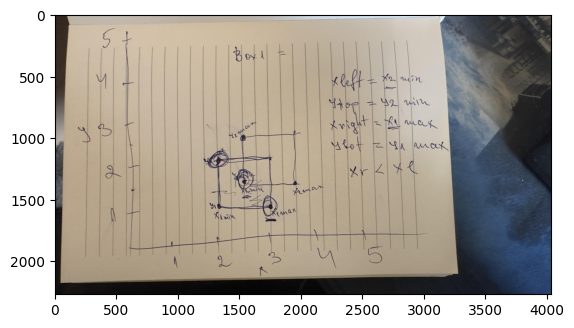

In [69]:
image = plt.imread("unnamed.jpg")

rotated = np.rot90(image)

plt.imshow(rotated)
plt.axis("on")
plt.show()

### * Problem 7. Fundamental Theorem of Algebra
Consider a polynomial like $x^4 - 2x^2 + 1$. How many roots does it have? Try factoring it out, or just find the solutions using `numpy` or `sympy`. 

Now, try out the solutions to $x^2 = 0$ $x^3 = 0$, $x^4 = 0$, and $x^5 = 0$.

What do you observe about their roots? What do you think about the _geometry_ of the visualization?

### ** Problem 8. Huffman Compression Algorithm
Examine and implement the **Huffman algorithm** for compressing data. It's based on information theory and probability theory. Document your findings and provide your implementation.

This algorithm is used for **lossless compression**: compressing data without loss of quality. You can use the following checklist:

* What is the difference between lossless and lossy compression?
* When can we get away with lossy compression?
* What is entropy?
* How are Huffman trees constructed?
    * Provide a few examples
* How can we get back the uncompressed data from the Huffman tree?
* How and where are Huffman trees stored?
* Implement the algorithm. Add any other formulas / assumptions / etc. you might need.
* Test the algorithm. A good measure would be percentage compression: $$\frac{\text{compressed}}{\text{uncompressed}} * 100\%$$
* How well does Huffman's algorithm perform compared to other compression algorithms (e.g. LZ77)?